In [29]:
#imports
from __future__ import print_function
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import mlbgame


In [30]:
#read files and create dataframes
frames = {}
file_names = ['2019_standings','2018_standings','2017_standings','2016_standings','2015_standings','team_wins',
             '2015_bat','2016_bat','2017_bat','2018_bat','2019_bat', 'league_divs',
              '2015_field','2016_field','2017_field','2018_field','2019_field',
              '2015_pitch','2016_pitch','2017_pitch','2018_pitch','2019_pitch','team_abbreviations']
for file_name in (file_names):
    with_extension = file_name + '.csv'
    path = os.path.join('Resources',with_extension,)
    df = pd.read_csv(path)
    frames[file_name] = df
for frame in frames:
    print(frames[frame].head())


    Rk                   Tm    W   L   W-L%    R   RA  Rdiff  SOS  SRS  ...  \
0  1.0       Houston Astros  107  55  0.660  5.7  4.0    1.7 -0.3  1.4  ...   
1  2.0  Los Angeles Dodgers  106  56  0.654  5.5  3.8    1.7  0.0  1.7  ...   
2  3.0     New York Yankees  103  59  0.636  5.8  4.6    1.3 -0.3  1.0  ...   
3  4.0      Minnesota Twins  101  61  0.624  5.8  4.7    1.1 -0.5  0.7  ...   
4  5.0       Atlanta Braves   97  65  0.599  5.3  4.6    0.7  0.1  0.8  ...   

    vWest   Inter   Home   Road   ExInn    1Run   vRHP    vLHP  ≥.500  <.500  
0   56-20  09-Nov  60-21  47-34  04-Oct   24-19  69-44  Nov-38  35-28  72-27  
1   51-25  10-Oct  59-22  47-34  04-Jun   27-22  76-34   30-22  45-32  61-24  
2   19-14  08-Dec  57-24  46-35  04-Jul   18-19  70-41   33-18  43-32  60-27  
3  23-Nov  12-Aug  46-35  55-26  07-May  23-Dec  79-44   22-17  32-37  69-24  
4   18-15  13-Jul  50-31  47-34  06-Nov   28-16  74-51   23-14  52-43  45-22  

[5 rows x 24 columns]
    Rk                 Tm   

In [32]:
stand2019 = frames['2019_standings']
bat2019 = frames['2019_bat']
stand2019.head()
wins2019 = stand2019[['Tm','W','L','W-L%','R','RA','Rdiff']]
hr2019 = bat2019[['Tm','HR','R']]
hr2019 = hr2019.rename(columns={'R':'R_total'})
wins_hr_2019 = wins2019.merge(hr2019,how='inner',on='Tm')
wins_hr_2019

,Tm,W,L,W-L%,R,RA,Rdiff,HR,R_total
0,Houston Astros,107,55,0.660,5.7,4.0,1.7,288,920
1,Los Angeles Dodgers,106,56,0.654,5.5,3.8,1.7,279,886
2,New York Yankees,103,59,0.636,5.8,4.6,1.3,306,943
3,Minnesota Twins,101,61,0.624,5.8,4.7,1.1,307,939
4,Atlanta Braves,97,65,0.599,5.3,4.6,0.7,249,855
5,Oakland Athletics,97,65,0.599,5.2,4.2,1.0,257,845
6,Tampa Bay Rays,96,66,0.593,4.7,4.0,0.7,217,769
7,Washington Nationals,93,69,0.574,5.4,4.5,0.9,231,873
8,Cleveland Indians,93,69,0.574,4.7,4.1,0.7,223,769
9,St. Louis Cardinals,91,71,0.562,4.7,4.1,0.6,210,764


In [33]:
merged= stand2019.merge(bat2019,how='inner',on='Tm')
merged.corr()

,Rk,W,L,W-L%,R_x,RA,Rdiff,SOS,SRS,Luck,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
Rk,1.000000,-0.989257,0.990266,-0.989591,-0.782462,0.811815,-0.961608,0.325610,-0.926627,-0.448014,...,-0.776475,-0.812862,-0.794656,-0.734679,-0.100620,-0.343857,0.026486,-0.296114,-0.383843,-0.552649
W,-0.989257,1.000000,-0.999889,0.999979,0.803298,-0.814996,0.975633,-0.286598,0.947143,0.440542,...,0.793792,0.828259,0.812007,0.745713,0.084809,0.322964,0.003799,0.271154,0.394975,0.528548
L,0.990266,-0.999889,1.000000,-0.999952,-0.801456,0.815290,-0.974778,0.292908,-0.944972,-0.443809,...,-0.793432,-0.827729,-0.812194,-0.745450,-0.083948,-0.322012,-0.002786,-0.271779,-0.392867,-0.529377
W-L%,-0.989591,0.999979,-0.999952,1.000000,0.802268,-0.815389,0.975284,-0.289279,0.946242,0.441987,...,0.793250,0.827559,0.812067,0.745266,0.083639,0.322968,0.003262,0.269274,0.393273,0.527943
R_x,-0.782462,0.803298,-0.801456,0.802268,1.000000,-0.377697,0.812169,-0.342900,0.761326,0.241211,...,0.954953,0.965576,0.878916,0.951435,0.032416,0.153672,-0.020790,0.350867,0.324182,0.490669
RA,0.811815,-0.814996,0.815290,-0.815389,-0.377697,1.000000,-0.845551,0.147929,-0.848623,-0.163498,...,-0.414202,-0.455083,-0.518759,-0.328864,-0.193663,-0.464101,-0.074721,-0.123194,-0.303917,-0.325219
Rdiff,-0.961608,0.975633,-0.974778,0.975284,0.812169,-0.845551,1.000000,-0.307179,0.967558,0.244485,...,0.808554,0.840521,0.832879,0.750963,0.141624,0.367262,0.021720,0.285854,0.373304,0.479813
SOS,0.325610,-0.286598,0.292908,-0.289279,-0.342900,0.147929,-0.307179,1.000000,-0.065863,-0.038665,...,-0.411006,-0.380031,-0.487862,-0.413928,0.046218,0.112267,0.465651,-0.310122,0.359114,-0.031724
SRS,-0.926627,0.947143,-0.944972,0.946242,0.761326,-0.848623,0.967558,-0.065863,1.000000,0.240396,...,0.747527,0.787064,0.748286,0.686097,0.163289,0.433844,0.149475,0.213898,0.475022,0.491070
Luck,-0.448014,0.440542,-0.443809,0.441987,0.241211,-0.163498,0.244485,-0.038665,0.240396,1.000000,...,0.219344,0.233363,0.202535,0.244552,-0.180939,-0.145440,-0.152706,-0.010756,0.252252,0.341229


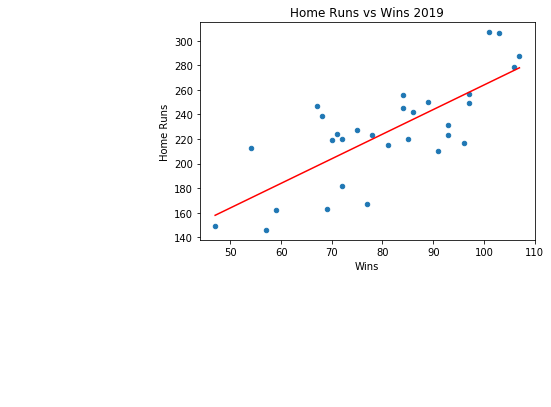

,W,L,W-L%,R,RA,Rdiff,HR,R_total
W,1.000000,-0.999889,0.999979,0.803298,-0.814996,0.975633,0.763656,0.817234
L,-0.999889,1.000000,-0.999952,-0.801456,0.815290,-0.974778,-0.761753,-0.815306
W-L%,0.999979,-0.999952,1.000000,0.802268,-0.815389,0.975284,0.762847,0.816175
R,0.803298,-0.801456,0.802268,1.000000,-0.377697,0.812169,0.838009,0.998821
RA,-0.814996,0.815290,-0.815389,-0.377697,1.000000,-0.845551,-0.474895,-0.397443
Rdiff,0.975633,-0.974778,0.975284,0.812169,-0.845551,1.000000,0.782449,0.824915
HR,0.763656,-0.761753,0.762847,0.838009,-0.474895,0.782449,1.000000,0.848417
R_total,0.817234,-0.815306,0.816175,0.998821,-0.397443,0.824915,0.848417,1.000000


In [34]:
wins_hr_2019.plot.scatter(x = 'W', y = 'HR')
x_values = wins_hr_2019['W']
y_values = wins_hr_2019['HR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Home Runs vs Wins 2019')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()
wins_hr_2019.corr()

In [35]:
stand2018 = frames['2018_standings']
bat2018 = frames['2018_bat']
wins2018 = stand2018[['Tm','W','L','W-L%','R','RA','Rdiff']]
hr2018 = bat2018[['Tm','HR','R']]
hr2018 = hr2018.rename(columns={'R':'R_total'})
wins_hr_2018 = wins2018.merge(hr2018,how='inner',on='Tm')
wins_hr_2018

,Tm,W,L,W-L%,R,RA,Rdiff,HR,R_total
0,Boston Red Sox,108,54,0.667,5.4,4.0,1.4,208,876
1,Houston Astros,103,59,0.636,4.9,3.3,1.6,205,797
2,New York Yankees,100,62,0.617,5.3,4.1,1.1,267,851
3,Oakland Athletics,97,65,0.599,5.0,4.2,0.9,227,813
4,Milwaukee Brewers,96,67,0.589,4.6,4.0,0.6,218,754
5,Chicago Cubs,95,68,0.583,4.7,4.0,0.7,167,761
6,Los Angeles Dodgers,92,71,0.564,4.9,3.7,1.2,235,804
7,Cleveland Indians,91,71,0.562,5.0,4.0,1.0,216,818
8,Colorado Rockies,91,72,0.558,4.8,4.6,0.2,210,780
9,Atlanta Braves,90,72,0.556,4.7,4.1,0.6,175,759


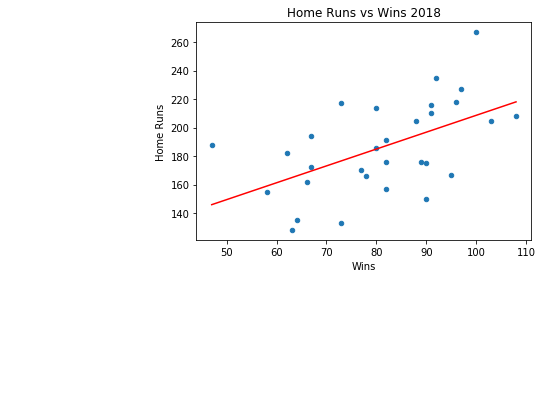

,W,L,W-L%,R,RA,Rdiff,HR,R_total
W,1.000000,-0.999581,0.999875,0.845540,-0.872901,0.954934,0.540622,0.838929
L,-0.999581,1.000000,-0.999896,-0.843499,0.873235,-0.953808,-0.533546,-0.835746
W-L%,0.999875,-0.999896,1.000000,0.845004,-0.872933,0.954592,0.537238,0.837894
R,0.845540,-0.843499,0.845004,1.000000,-0.623115,0.884886,0.764571,0.997132
RA,-0.872901,0.873235,-0.872933,-0.623115,1.000000,-0.914016,-0.329154,-0.622322
Rdiff,0.954934,-0.953808,0.954592,0.884886,-0.914016,1.000000,0.587531,0.884569
HR,0.540622,-0.533546,0.537238,0.764571,-0.329154,0.587531,1.000000,0.773674
R_total,0.838929,-0.835746,0.837894,0.997132,-0.622322,0.884569,0.773674,1.000000


In [38]:
wins_hr_2018.plot.scatter(x = 'W', y = 'HR')
x_values = wins_hr_2018['W']
y_values = wins_hr_2018['HR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Home Runs vs Wins 2018')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()
wins_hr_2018.corr()

In [37]:
stand2017 = frames['2017_standings']
bat2017 = frames['2017_bat']
wins2017 = stand2017[['Tm','W','L','W-L%']]
hr2017 = bat2017[['Tm','HR','R']]
wins_hr_2017 = wins2017.merge(hr2017,how='inner',on='Tm')
wins_hr_2017

,Tm,W,L,W-L%,HR,R
0,Los Angeles Dodgers,104,58,0.642,221,770
1,Cleveland Indians,102,60,0.630,212,818
2,Houston Astros,101,61,0.624,238,896
3,Washington Nationals,97,65,0.599,215,819
4,Boston Red Sox,93,69,0.574,168,785
5,Arizona Diamondbacks,93,69,0.574,220,812
6,Chicago Cubs,92,70,0.568,223,822
7,New York Yankees,91,71,0.562,241,858
8,Colorado Rockies,87,75,0.537,192,824
9,Milwaukee Brewers,86,76,0.531,224,732


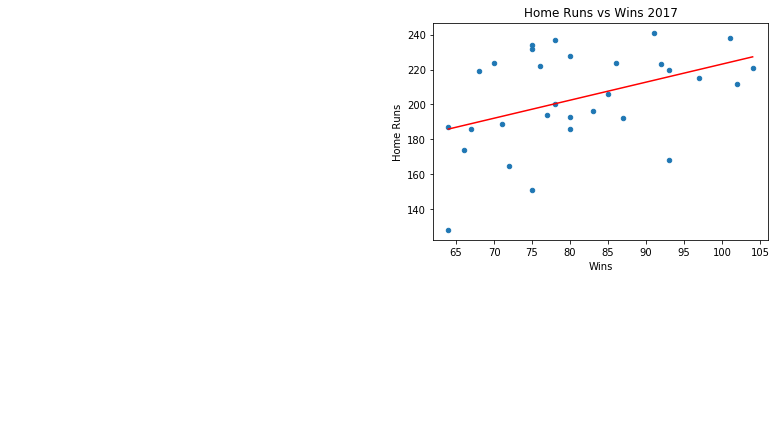

,W,L,W-L%,HR,R
W,1.000000,-1.000000,0.999994,0.430087,0.722886
L,-1.000000,1.000000,-0.999994,-0.430087,-0.722886
W-L%,0.999994,-0.999994,1.000000,0.430543,0.723050
HR,0.430087,-0.430087,0.430543,1.000000,0.544444
R,0.722886,-0.722886,0.723050,0.544444,1.000000


In [9]:
wins_hr_2017.plot.scatter(x = 'W', y = 'HR')
x_values = wins_hr_2017['W']
y_values = wins_hr_2017['HR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Home Runs vs Wins 2017')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()
wins_hr_2017.corr()

In [10]:
stand2016 = frames['2016_standings']
bat2016 = frames['2016_bat']
wins2016 = stand2016[['Tm','W','L','W-L%']]
hr2016 = bat2016[['Tm','HR','R']]
wins_hr_2016 = wins2016.merge(hr2016,how='inner',on='Tm')
wins_hr_2016

,Tm,W,L,W-L%,HR,R
0,Chicago Cubs,103,58,0.640,199,808
1,Washington Nationals,95,67,0.586,203,763
2,Texas Rangers,95,67,0.586,215,765
3,Cleveland Indians,94,67,0.584,185,777
4,Boston Red Sox,93,69,0.574,208,878
5,Los Angeles Dodgers,91,71,0.562,189,725
6,Toronto Blue Jays,89,73,0.549,221,759
7,Baltimore Orioles,89,73,0.549,253,744
8,San Francisco Giants,87,75,0.537,130,715
9,New York Mets,87,75,0.537,218,671


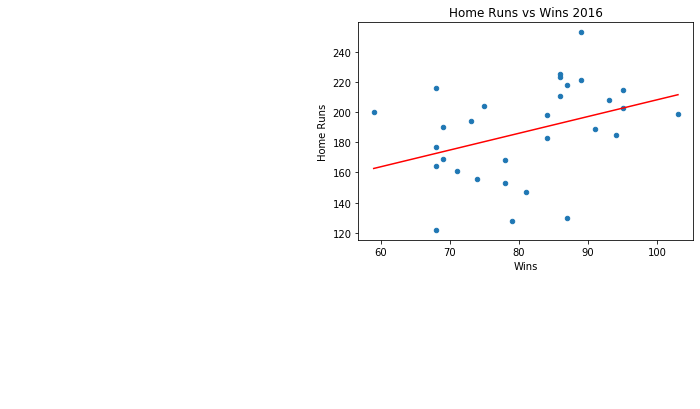

,W,L,W-L%,HR,R
W,1.000000,-0.999307,0.999789,0.371229,0.541275
L,-0.999307,1.000000,-0.999827,-0.355993,-0.538252
W-L%,0.999789,-0.999827,1.000000,0.363772,0.540633
HR,0.371229,-0.355993,0.363772,1.000000,0.514395
R,0.541275,-0.538252,0.540633,0.514395,1.000000


In [11]:
wins_hr_2016.plot.scatter(x = 'W', y = 'HR')
x_values = wins_hr_2016['W']
y_values = wins_hr_2016['HR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Home Runs vs Wins 2016')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()
wins_hr_2016.corr()

In [12]:
stand2015 = frames['2015_standings']
bat2015 = frames['2015_bat']
wins2015 = stand2015[['Tm','W','L','W-L%']]
hr2015 = bat2015[['Tm','HR','R']]
wins_hr_2015 = wins2015.merge(hr2015,how='inner',on='Tm')
wins_hr_2015

,Tm,W,L,W-L%,HR,R
0,St. Louis Cardinals,100,62,0.617,137,647
1,Pittsburgh Pirates,98,64,0.605,140,697
2,Chicago Cubs,97,65,0.599,171,689
3,Kansas City Royals,95,67,0.586,139,724
4,Toronto Blue Jays,93,69,0.574,232,891
5,Los Angeles Dodgers,92,70,0.568,187,667
6,New York Mets,90,72,0.556,177,683
7,Texas Rangers,88,74,0.543,172,751
8,New York Yankees,87,75,0.537,212,764
9,Houston Astros,86,76,0.531,230,729


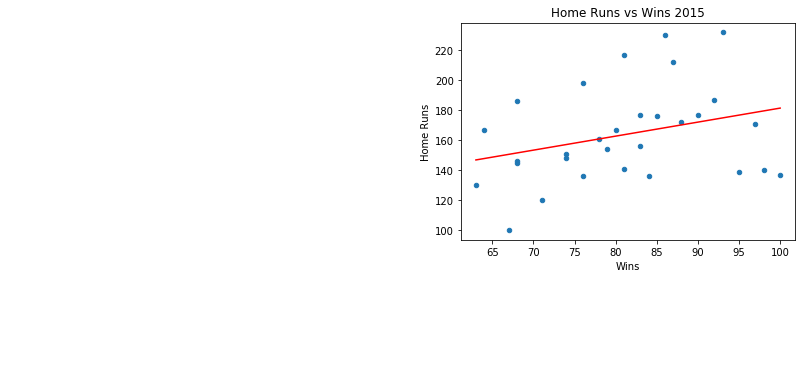

,W,L,W-L%,HR,R
W,1.000000,-0.999707,0.999918,0.307407,0.430751
L,-0.999707,1.000000,-0.999918,-0.304329,-0.430530
W-L%,0.999918,-0.999918,1.000000,0.306449,0.430200
HR,0.307407,-0.304329,0.306449,1.000000,0.671283
R,0.430751,-0.430530,0.430200,0.671283,1.000000


In [13]:
wins_hr_2015.plot.scatter(x = 'W', y = 'HR')
x_values = wins_hr_2015['W']
y_values = wins_hr_2015['HR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Home Runs vs Wins 2015')
plt.xlabel('Wins')
plt.ylabel('Home Runs')
plt.show()
wins_hr_2015.corr()

In [15]:
month = mlbgame.games(2015, 6,home='Mets')
games = mlbgame.combine_games(month)
count = 0
for game in games:
    print(game)
    count+=1
print(count)

Giants (5) at Mets (0)
Giants (8) at Mets (5)
Giants (4) at Mets (5)
Braves (3) at Mets (5)
Braves (5) at Mets (3)
Braves (8) at Mets (10)
Blue Jays (3) at Mets (4)
Blue Jays (2) at Mets (3)
Reds (1) at Mets (2)
Reds (1) at Mets (2)
Reds (2) at Mets (7)
Reds (1) at Mets (2)
Cubs (1) at Mets (0)
13
